In [1]:
import numpy as np
from collections import Counter
import csv
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sns

train_data2 = pd.read_csv("D2_train_20.csv")
train_data2 = np.array(train_data2)

test_data2 = pd.read_csv("D2_test_20.csv")
test_data2 =np.array(test_data2)

train_data3 = pd.read_csv("D3_train_20.csv")
train_data3 = np.array(train_data3)

test_data3 = pd.read_csv("D3_test_20.csv")
test_data3 =np.array(test_data3)


X_train2 =[x[0:2] for x in train_data2]
y_train2 =[x[2] for x in train_data2]
X_train3 =[x[0:2] for x in train_data3]
y_train3 =[x[2] for x in train_data3]

X_test2 =[x[0:2] for x in test_data2]
y_test2 =[x[2] for x in test_data2]
X_test3 =[x[0:2] for x in test_data3]
y_test3 =[x[2] for x in test_data3]

# X_train =[]
# y_train =[]
X_test = []
y_test = []

x_subtrain2 = []
y_subtrain2 = []
x_validation2 = []
y_validation2 = []


for i in range(len(train_data2)):
    l1 = int((0.5)*(len(train_data2)))
    # l2 = int((0.3)*(len(train_data)))

    if(i< l1):
        x_subtrain2.append(train_data2[i][0:2])
        y_subtrain2.append(train_data2[i][2])

    if(i> l1 or i==l1):
        x_validation2.append(train_data2[i][0:2])
        y_validation2.append(train_data2[i][2])
        
               

x_subtrain3 = []
y_subtrain3 = []
x_validation3 = []
y_validation3 = []

for i in range(len(train_data3)):
    l1 = int((0.8)*(len(train_data3)))
    # l2 = int((0.3)*(len(train_data)))

    if(i< l1):
        x_subtrain3.append(train_data3[i][0:2])
        y_subtrain3.append(train_data3[i][2])

    if(i> l1 or i==l1):
        x_validation3.append(train_data3[i][0:2])
        y_validation3.append(train_data3[i][2])        

def euclidean_distance(x1,x2):
    sum_sq =0

    for i in range(len(x1)):
        sum_sq += (float(x1[i])-float(x2[i]))**2

    return np.sqrt(sum_sq)    

class KNN:

    def __init__(self, k=3):   #constructor
        self.k = k

    def training(self,X,y):    #training function , in this case nothing  to do just assigning is enough
        self.X_train = X
        self.y_train = y

    def predction(self,X):     #predction function, that predicts labels for the testing data and returns
        predicted_labes = [self.pred_help_fun(x) for x in X]
        return np.array(predicted_labes)

    def pred_help_fun(self,x):    #takes a saple x and gives the  prediction label
        #step-1 to find the distances from all the other samples
        
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]    
        
        #step-2 to find the k nearest labels
        k_nearest_indices = np.argsort(distances)[:self.k]
        #print("k_nearest_neighbours: ",k_nearest_indices)
        k_labels = [self.y_train[i] for i in k_nearest_indices]
        #print("k_labels: ",k_labels)

        #step-3 to find the majority label
        most_common_label = Counter(k_labels).most_common(1) #it will return a list with pair
        return most_common_label[0][0]
    
        

def analize_the_classfier(ind):
    K = []
    Accuracy =[]
    if(ind == 1):
        for i in range(1,500):
            K.append(i)
            clf = KNN(k=i)
            clf.training(X_train2,y_train2)

            predictions = clf.predction(X_test2)
            #now lets find the accuracy 
            no_of_matches = 0
            for i in range (0, len(y_test2)):
                if(y_test2[i]==predictions[i]):  
                    no_of_matches = no_of_matches +1

            Accuracy.append((float(no_of_matches/len(y_test2))*100))
    else:

        for i in range(1,500):
            K.append(i)
            clf = KNN(k=i)
            clf.training(X_train3,y_train3)

            predictions = clf.predction(X_test3)
            #now lets find the accuracy 
            no_of_matches = 0
            for i in range (0, len(y_test3)):
                if(y_test3[i]==predictions[i]):
                    no_of_matches = no_of_matches +1

            Accuracy.append((float(no_of_matches/len(y_test3))*100))

    plot_x =K
    plot_y = Accuracy

    fig = plt.figure(figsize=(4, 3))
    plt.plot(plot_x, plot_y, color = 'g', linestyle = 'dashed',
                marker = 'o',label = "Accuracy")
        
    # plt.xticks(rotation = 25)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title(f'K vs Accuracy for test data {ind}', fontsize = 20)
    plt.grid()
    plt.legend()
    plt.show()

def accuracy_for_train_and_test(ind):
        X_train = []
        y_train = []
        if(ind==1):
            print("data 2 here:")
            X_train = X_train2
            y_train = y_train2
            X_test  = X_test2
            y_test  = y_test2
        else:
            print("data 3 here")
            X_train = X_train3
            y_train = y_train3
            X_test  = X_test3
            y_test  = y_test3  

        clf = KNN(k=10)
        clf.training(X_train,y_train)

        train_predictions = clf.predction(X_train)
        test_predictions  = clf.predction(X_test)

        matches = 0
        for i in range(len(y_train)):
            if(train_predictions[i] == y_train[i]):
                matches +=1
        # print(matches)        

        acc1 = (int(matches/len(y_train)*100))
        print("Accuracy on traing data : ", acc1)

        matches = 0
        for i in range(len(y_test)):
            if(test_predictions[i]==y_test[i]):
                matches +=1
        acc2 = (int(matches/len(y_test)*100))  
        print("Accuracy on testing data : ",acc2)    

def print_confusion_mat(ind):
    if(ind==1):
        X_train = X_train2
        y_train = y_train2
        X_test  = X_test2
        y_test  = y_test2
    else:
        X_train = X_train3
        y_train = y_train3
        X_test  = X_test3
        y_test  = y_test3

    actual_ytrain = y_train
    actual_ytest  = y_test

    clf = KNN(k=10)
    clf.training(X_train,y_train)

    predicted_ytrain = clf.predction(X_train)
    predicted_ytest  = clf.predction(X_test)

    if(ind == 1):
        #it is belongs to dataset2
        cf_mat_train = np.zeros((3,3))
        cf_mat_test  = np.zeros((3,3))

        for i in range(len(y_train)):
            x1 = int(actual_ytrain[i])
            y1 = int(predicted_ytrain[i])
            cf_mat_train[x1][y1] +=1
        for i in range(len(y_test)):
            x1 = int(actual_ytest[i])
            y1 = int(predicted_ytest[i])
            cf_mat_test[x1][y1]  +=1

        print("Confusion matrix of train data : ")
        #print(cf_mat_train)
        
        fig = plt.figure(figsize=(4, 3))
        sns.heatmap(cf_mat_train, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Actual label')
        plt.ylabel('Predicted label')
        plt.title('conf mat on train data')
        plt.show()

        fig = plt.figure(figsize=(4, 3))
        print("Confusion matrix on test data: ")
        sns.heatmap(cf_mat_test, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Actual label')
        plt.ylabel('Predicted Label')
        plt.title('conf mat on test data')
        plt.show()
        #print(cf_mat_test)     

    if(ind ==2):
        #it is belongs to dataset3
        cf_mat_train = np.zeros((2,2))
        cf_mat_test  = np.zeros((2,2)) 

        for i in range(len(y_train)):
            x1 = int(actual_ytrain[i])
            y1 = int(predicted_ytrain[i])
            cf_mat_train[x1][y1] +=1
        for i in range(len(y_test)):
            x1 = int(actual_ytest[i])
            y1 = int(predicted_ytest[i])
            cf_mat_test[x1][y1]  +=1 

        print("Confusion matrix on train data: ")
        fig = plt.figure(figsize=(4, 3))
        sns.heatmap(cf_mat_train, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Actual Label')
        plt.ylabel('Predicted Label')
        plt.title('conf mat on train data')
        plt.show()
        #print(cf_mat_train)

        print("Confusion matrix on test data: ")
        fig = plt.figure(figsize=(4, 3))
        sns.heatmap(cf_mat_test, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Actual Label')
        plt.ylabel('Predicted Label')
        plt.title('conf mat on test data')
        plt.show()
        #print(cf_mat_test)    

def plot_fun(ind):
  
  train_data = []
  test_data = []
  if(ind ==1):
      train_data = train_data2
      test_data = test_data2
  else:
      train_data = train_data3 
      test_data = test_data3 

  fig = plt.figure(figsize=(4, 3))      
  plt.xlabel("x")
  plt.ylabel("y")

  x_min,x_max = train_data[:,0].min()-0.5, train_data[:,0].max()+0.5
  y_min,y_max = train_data[:,1].min()-0.5, train_data[:,1].max()+0.5
  xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1)) #change according to requirement
#   z = predicte(np.c_[xx.ravel(),yy.ravel()])[:,2]
  sample_data = []
  for i in range(len(xx)):
        for j in range(len(xx[0])):
            sample_data.append([xx[i][j], yy[i][j]])

  clf = KNN(k=10) 
  if(ind ==1):
      clf.training(X_train2,y_train2)
  else:
      clf.training(X_train3, y_train3)
      
  z= clf.predction(sample_data)
  z = z.reshape(xx.shape)

  #palette = ['mocassin','lightsteelblue'] , palette = ['orange','cyan'] , palette = ['darkorange','c']
  plt.contourf(xx, yy, z)
  #sns.scatterplot(x = train_data[:,0], y = train_data[:,1], hue = train_data[:,2])
  sns.scatterplot(x = test_data[:,0], y = test_data[:,1], hue = test_data[:,2])

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

  plt.title("KNN ")
  plt.show()


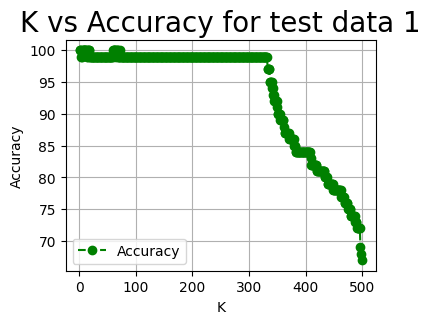

data 2 here:
Accuracy on traing data :  100
Accuracy on testing data :  100


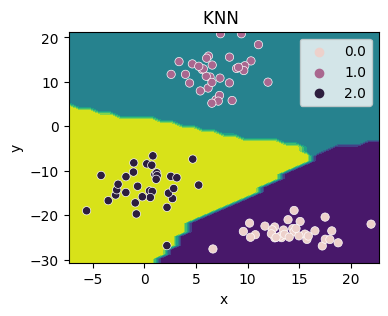

Confusion matrix of train data : 


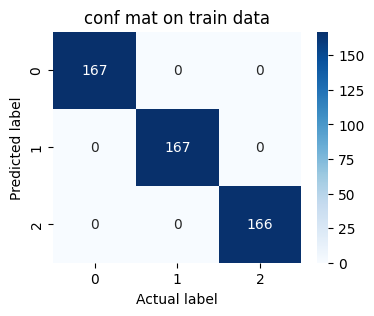

Confusion matrix on test data: 


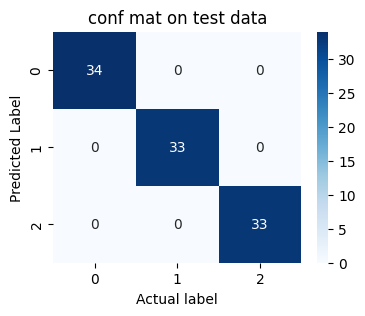

In [2]:
analize_the_classfier(1)
#from the above graph the best relult is showing at k =10
accuracy_for_train_and_test(1)
plot_fun(1)
print_confusion_mat(1)

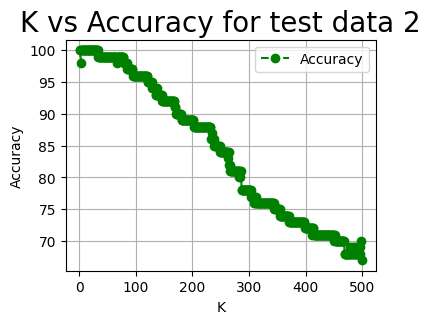

data 3 here
Accuracy on traing data :  99
Accuracy on testing data :  100


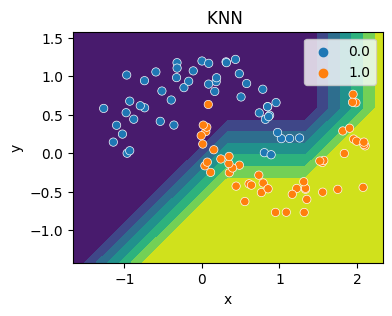

Confusion matrix on train data: 


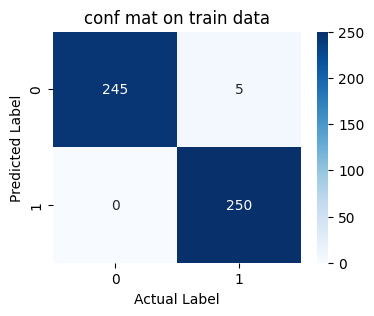

Confusion matrix on test data: 


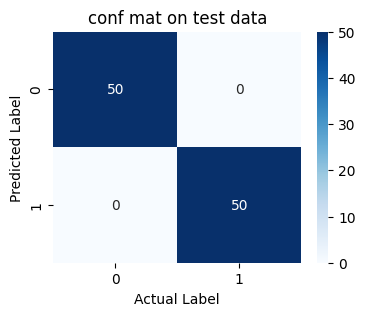

In [3]:
analize_the_classfier(2)
accuracy_for_train_and_test(2)
plot_fun(2)
print_confusion_mat(2)
